In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content/drive/MyDrive/UCSP/IX CICLO/topicos de IA/Lab 3/
%ls

/content/drive/MyDrive/UCSP/IX CICLO/topicos de IA/Lab 3
convergencia_costo.png  matriz_correlacion.png                 Multivariate_Linear_Regression.ipynb
creditcard_2023.csv     Multivariate_Linear_Regression2.ipynb  real_vs_predicciones.png


In [24]:
import pandas as pd
import numpy as np

# Función para leer los datos
def leer_datos(ruta_archivo):
    return pd.read_csv(ruta_archivo)

# Función para normalizar usando Min-Max
def normalizar_min_max(df):
    return (df - df.min()) / (df.max() - df.min())

# Función para crear la matriz de correlación
def matriz_correlacion(df):
    return df.corr()


In [35]:
df = leer_datos('creditcard_2023.csv')

print("Información del dataset:")
print(df.info())

print("Valores NaN en el dataset:")
print(df.isna().sum())

print("\nTipos de datos en el dataset:")
print(df.dtypes)

print("\nEstadísticas descriptivas:")
print(df.describe())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null

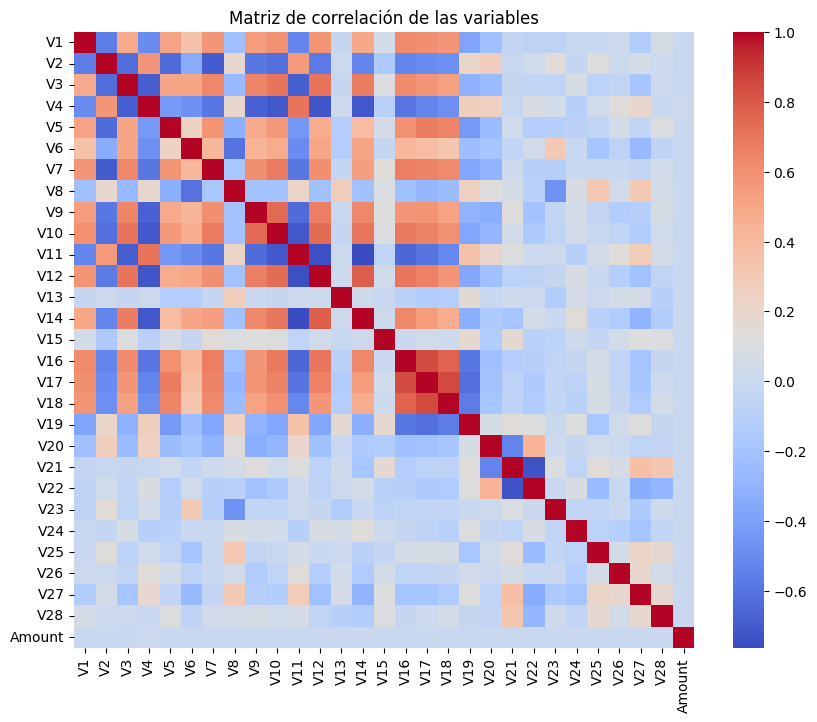


Variables con mayor correlación con 'Amount':
Amount    1.000000
V13       0.002718
V3        0.002001
V23       0.001981
V4        0.001859
V9        0.001589
V18       0.001516
V28       0.001503
V20       0.001405
V14       0.001363
Name: Amount, dtype: float64

Matriz de correlación de las 10 variables más correlacionadas con Amount:
          Amount       V13        V3       V23        V4        V9       V18  \
Amount  1.000000 -0.002718 -0.002001 -0.001981  0.001859 -0.001589 -0.001516   
V13    -0.002718  1.000000 -0.019272 -0.123520  0.011519 -0.006167 -0.122049   
V3     -0.002001 -0.019272  1.000000 -0.058884 -0.687726  0.648615  0.525509   
V23    -0.001981 -0.123520 -0.058884  1.000000  0.043266 -0.042371 -0.046262   
V4      0.001859  0.011519 -0.687726  0.043266  1.000000 -0.676648 -0.482267   
V9     -0.001589 -0.006167  0.648615 -0.042371 -0.676648  1.000000  0.522720   
V18    -0.001516 -0.122049  0.525509 -0.046262 -0.482267  0.522720  1.000000   
V28    -0.001503 -0

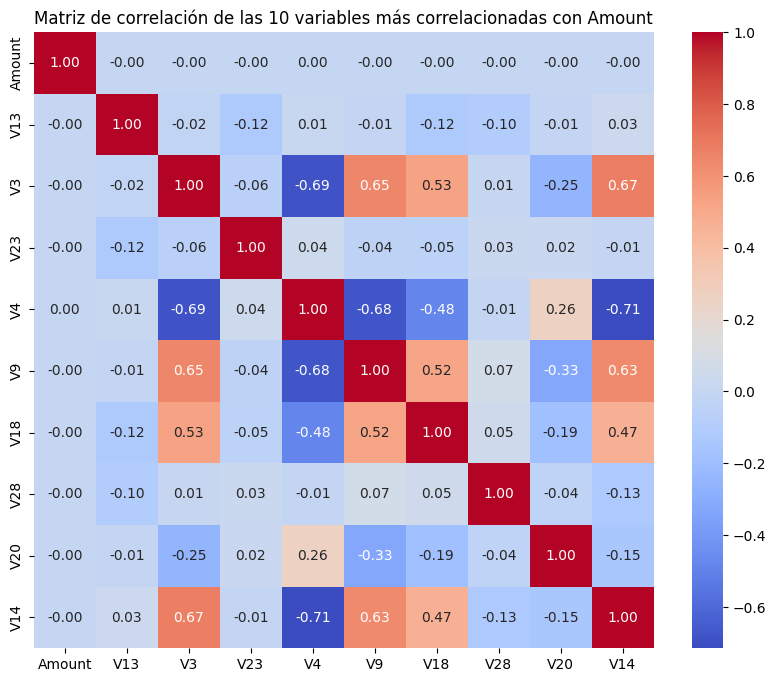

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear matriz de correlación
corr_matrix = matriz_correlacion(df.drop(['id', 'Class'], axis=1))

#plot de matriz de correlación
"""
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de las variables")
plt.show()
"""
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title("Matriz de correlación de las variables")
plt.show()

# Encontrar las variables con mayor correlación con 'Amount'
correlaciones_amount = corr_matrix['Amount'].abs().sort_values(ascending=False)

print("\nVariables con mayor correlación con 'Amount':")
print(correlaciones_amount.head(10))

# Visualizar la matriz de correlación (las 10 variables más correlacionadas con Amount)
top_10_vars = correlaciones_amount.head(10).index
print("\nMatriz de correlación de las 10 variables más correlacionadas con Amount:")
print(corr_matrix.loc[top_10_vars, top_10_vars])


plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix.loc[top_10_vars, top_10_vars], annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación de las 10 variables más correlacionadas con Amount")
plt.show()

In [31]:
def dividir_datos(X, y, train_ratio=0.7):
    n = X.shape[0]
    train_size = int(n * train_ratio)
    return X[:train_size], X[train_size:], y[:train_size], y[train_size:]

def regresion_lineal(X, y):
    X = np.column_stack((np.ones(X.shape[0]), X))
    return np.linalg.inv(X.T @ X) @ X.T @ y

def error_cuadratico_medio(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

def predecir(X, coef):
    X = np.column_stack((np.ones(X.shape[0]), X))
    return X @ coef

def experimento(X, y, train_ratio, nombre):
    X_train, X_test, y_train, y_test = dividir_datos(X, y, train_ratio)

    coef = regresion_lineal(X_train, y_train)
    y_pred_train = predecir(X_train, coef)
    y_pred_test = predecir(X_test, coef)

    mse_train = error_cuadratico_medio(y_train, y_pred_train)
    mse_test = error_cuadratico_medio(y_test, y_pred_test)

    print(f"\nExperimento {nombre}:")
    print(f"MSE (Train): {mse_train}")
    print(f"MSE (Test): {mse_test}")

    plt.figure(figsize=(15, 5))
    #plt.subplot(1, 2, 1)
    plt.subplot(1, 3, 1)
    plt.scatter(y_train, y_pred_train, alpha=0.5)
    plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
    plt.xlabel('Valor real')
    plt.ylabel('Valor predicho')
    plt.title(f'Train - {nombre}')

    #plt.subplot(1, 2, 2)
    plt.subplot(1, 3, 2)
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Valor real')
    plt.ylabel('Valor predicho')
    plt.title(f'Test - {nombre}')

    ######## agregago
    plt.subplot(1, 3, 3)
    residuos = y_test - y_pred_test
    sns.histplot(residuos, kde=True)
    plt.xlabel('Residuos')
    plt.title('Distribución de Residuos')

    plt.tight_layout()
    plt.show()

    return mse_train, mse_test, coef

In [28]:
# Cargar y preparar los datos
df = leer_datos('creditcard_2023.csv')
X = df.drop(['id', 'Class', 'Amount'], axis=1).values
y = df['Amount'].values

# Normalizar los datos
X_norm = normalizar_min_max(pd.DataFrame(X)).values
y_norm = normalizar_min_max(pd.DataFrame(y)).values.ravel()

print("X_norm shape:", X_norm.shape)
print("y_norm shape:", y_norm.shape)


X_norm shape: (568630, 28)
y_norm shape: (568630,)



Experimento 1 (70-30):
MSE (Train): 0.08339941246733613
MSE (Test): 0.08296762046364167


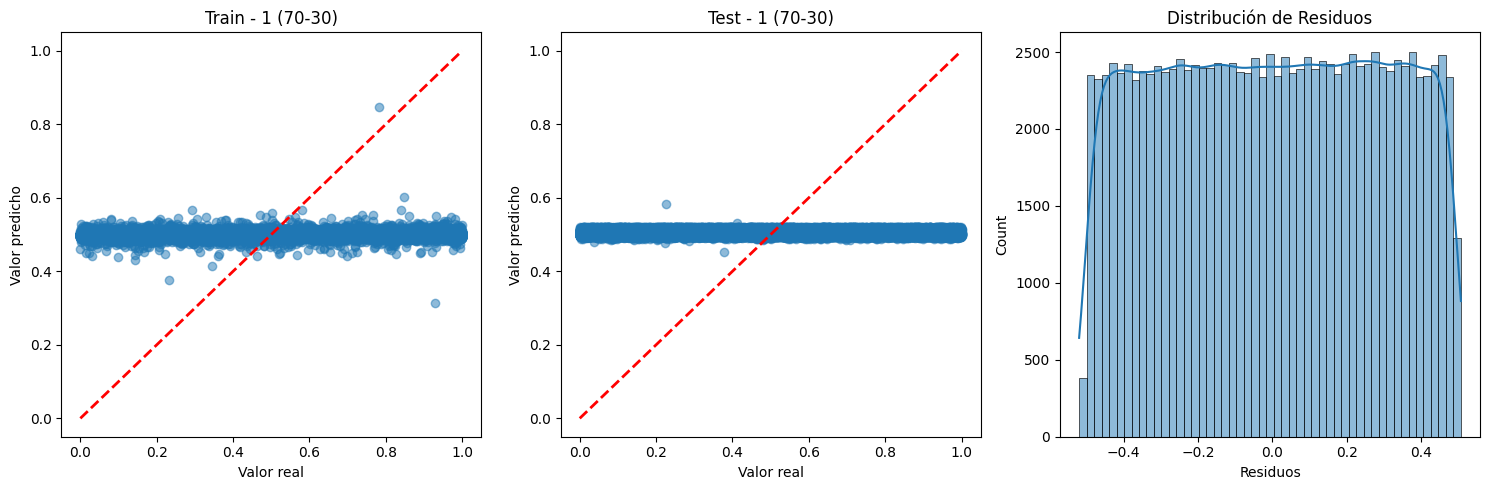


Experimento 2 (60-40):
MSE (Train): 0.08350210820271121
MSE (Test): 0.0829228864983752


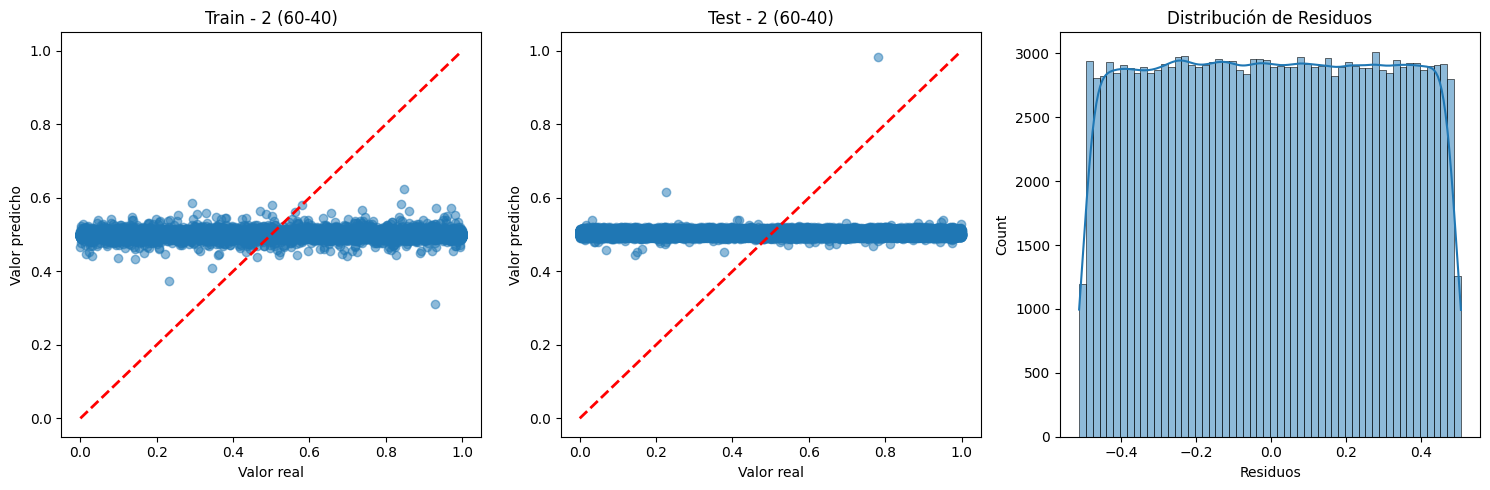


Experimento 3 (80-20):
MSE (Train): 0.08336685409305604
MSE (Test): 0.08287106345311296


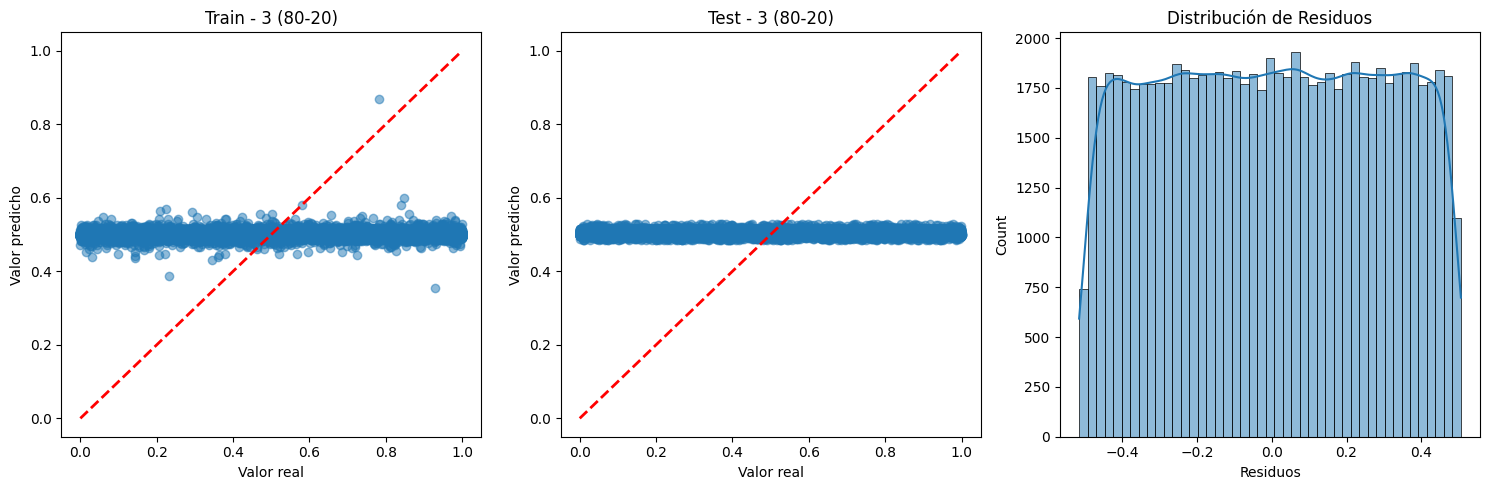


Evaluación del mejor modelo con datos de prueba originales:
MSE: 0.08304872469732205


In [32]:
# Dividir en conjuntos de entrenamiento (70%) y prueba (30%)
X_train_full, X_test, y_train_full, y_test = dividir_datos(X_norm, y_norm, 0.7)

# Realizar experimentos
exp1_train, exp1_test, coef1 = experimento(X_train_full, y_train_full, 0.7, "1 (70-30)")
exp2_train, exp2_test, coef2 = experimento(X_train_full, y_train_full, 0.6, "2 (60-40)")
exp3_train, exp3_test, coef3 = experimento(X_train_full, y_train_full, 0.8, "3 (80-20)")

# Evaluar el mejor modelo con los datos de prueba originales
mejor_coef = min([coef1, coef2, coef3], key=lambda c: error_cuadratico_medio(y_test, predecir(X_test, c)))
mejor_mse = error_cuadratico_medio(y_test, predecir(X_test, mejor_coef))

print("\nEvaluación del mejor modelo con datos de prueba originales:")
print(f"MSE: {mejor_mse}")

In [33]:
# Análisis comparativo de experimentos
experimentos = {
    "Exp 1 (70-30)": (exp1_train, exp1_test),
    "Exp 2 (60-40)": (exp2_train, exp2_test),
    "Exp 3 (80-20)": (exp3_train, exp3_test)
}

for nombre, (train_mse, test_mse) in experimentos.items():
    print(f"\n{nombre}:")
    print(f"  MSE Train: {train_mse}")
    print(f"  MSE Test:  {test_mse}")
    print(f"  Diferencia: {abs(train_mse - test_mse)}")

# Evaluar el mejor modelo con los datos de prueba originales
mejor_coef = min([coef1, coef2, coef3], key=lambda c: error_cuadratico_medio(y_test, predecir(X_test, c)))
mejor_mse = error_cuadratico_medio(y_test, predecir(X_test, mejor_coef))

print("\nEvaluación del mejor modelo con datos de prueba originales:")
print(f"MSE: {mejor_mse}")


Exp 1 (70-30):
  MSE Train: 0.08339941246733613
  MSE Test:  0.08296762046364167
  Diferencia: 0.0004317920036944617

Exp 2 (60-40):
  MSE Train: 0.08350210820271121
  MSE Test:  0.0829228864983752
  Diferencia: 0.0005792217043360109

Exp 3 (80-20):
  MSE Train: 0.08336685409305604
  MSE Test:  0.08287106345311296
  Diferencia: 0.0004957906399430806

Evaluación del mejor modelo con datos de prueba originales:
MSE: 0.08304872469732205


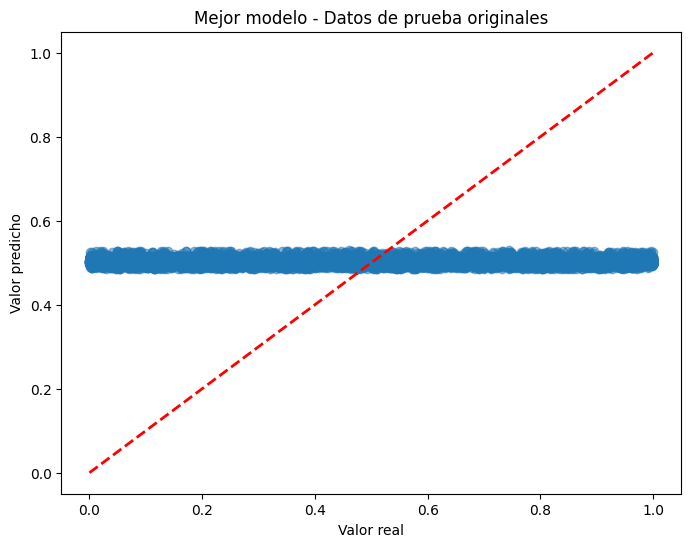

In [30]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predecir(X_test, mejor_coef), alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Valor real')
plt.ylabel('Valor predicho')
plt.title('Mejor modelo - Datos de prueba originales')
plt.show()

In [34]:
# Análisis final
print("\nAnálisis final:")
print("1. El mejor modelo basado en el MSE más bajo en los datos de prueba es:")
mejor_exp = min(experimentos, key=lambda x: experimentos[x][1])
print(f"   {mejor_exp} con un MSE de prueba de {experimentos[mejor_exp][1]}")
print(f"2. El MSE en los datos de prueba originales es: {mejor_mse}")
print("3. Interpretación de resultados:")
print("   - Si el MSE de prueba es similar al MSE de entrenamiento, el modelo generaliza bien.")
print("   - Si hay una gran diferencia, podría indicar sobreajuste u otros problemas.")
print("4. Limitaciones y posibles mejoras:")
print("   - Considerar técnicas de regularización como Ridge o Lasso para mejorar la generalización.")
print("   - Explorar la selección de características para identificar las variables más importantes.")
print("   - Considerar modelos no lineales si la relación entre las variables no es lineal.")


Análisis final:
1. El mejor modelo basado en el MSE más bajo en los datos de prueba es:
   Exp 3 (80-20) con un MSE de prueba de 0.08287106345311296
2. El MSE en los datos de prueba originales es: 0.08304872469732205
3. Interpretación de resultados:
   - Si el MSE de prueba es similar al MSE de entrenamiento, el modelo generaliza bien.
   - Si hay una gran diferencia, podría indicar sobreajuste u otros problemas.
4. Limitaciones y posibles mejoras:
   - Considerar técnicas de regularización como Ridge o Lasso para mejorar la generalización.
   - Explorar la selección de características para identificar las variables más importantes.
   - Considerar modelos no lineales si la relación entre las variables no es lineal.
